<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML8_svmnbdtknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8.	Applying SVM, Naive Bayes, Decision tree and KNN predict diabetes based on features set. Compare the four classification algorithms with performance metrics such as accuracy, recall, precision, F1- score. Also design the heat map confusion matrix for above algorithms and construct ROC curve for comparison.
Dataset: pima-indians-diabetes.data.csv


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [ ]:
# Step 3: Load the dataset
# df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
df = pd.read_csv('/content/diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Step 4: Prepare features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Step 5: Normalize and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Import models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = {
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}
metrics = {}

In [ ]:
# Step 7: Train and Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    metrics[name] = {
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "y_prob": y_prob
    }

In [ ]:
# Step 8: Print metrics
for name in metrics:
    print(f"\n🔍 {name}")
    print(f"Accuracy: {metrics[name]['Accuracy']:.4f}")
    print(f"Recall: {metrics[name]['Recall']:.4f}")
    print(f"Precision: {metrics[name]['Precision']:.4f}")
    print(f"F1 Score: {metrics[name]['F1 Score']:.4f}")


🔍 SVM
Accuracy: 0.7273
Recall: 0.5636
Precision: 0.6327
F1 Score: 0.5962

🔍 Naive Bayes
Accuracy: 0.7662
Recall: 0.7091
Precision: 0.6610
F1 Score: 0.6842

🔍 Decision Tree
Accuracy: 0.7532
Recall: 0.7273
Precision: 0.6349
F1 Score: 0.6780

🔍 KNN
Accuracy: 0.6883
Recall: 0.4909
Precision: 0.5745
F1 Score: 0.5294


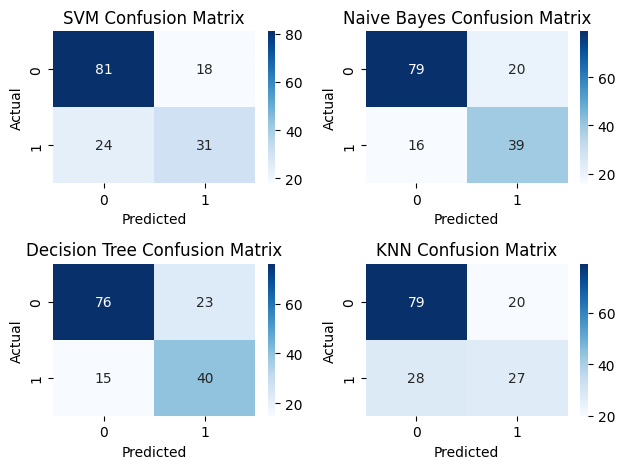

In [ ]:
for i, name in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.heatmap(metrics[name]["Confusion Matrix"], annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

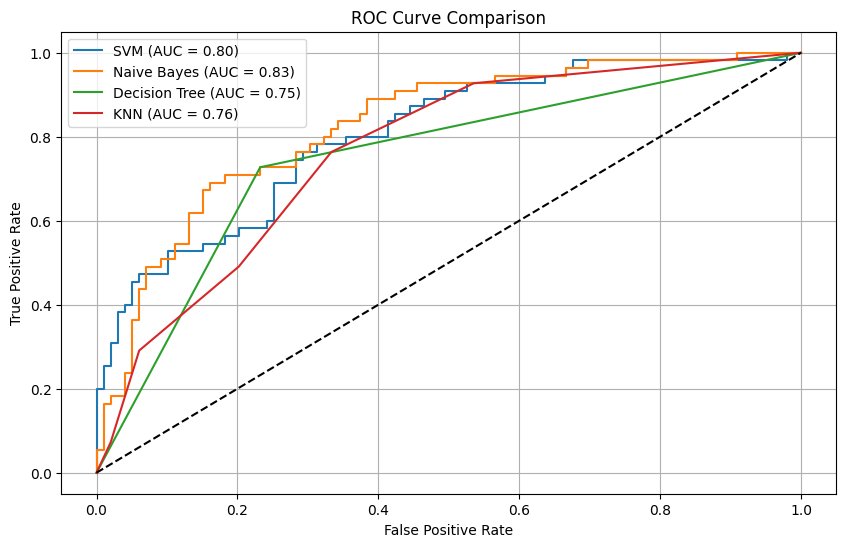

In [ ]:
# ROC Curve comparison
plt.figure(figsize=(10, 6))
for name in models:
    fpr, tpr, _ = roc_curve(y_test, metrics[name]["y_prob"])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()